## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [8]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:

def build_mlp(nurons = [512,256,128],l1_ratio = 0, l1_l2_ratio = 0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    if l1_ratio != 0:
        regularizer = keras.regularizers.l1(l1_ratio)
    else:
        regularizer = keras.regularizers.l1_l2(l1_l2_ratio)
    for index,nuron in enumerate(nurons):
        if index == 0:
            x = keras.layers.Dense(units = nuron,activation = 'relu',kernel_regularizer = regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units = nuron,activation = 'relu',kernel_regularizer = regularizer)(x)
            
        output_layer = keras.layers.Dense(units = 10,activation = 'softmax')(x)
        model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [13]:
"""Code Here
設定超參數
"""
epoch = 50
batch_size = 256
optimizer = keras.optimizers.SGD(lr = 0.001,momentum = .9,nesterov = True)
l1_ratio = [1e-1,1e-2,1e-3,1e-5,1e-8]
l1_l2_ratio = [1e-1,1e-2,1e-3,1e-5,1e-8]

In [74]:
results_l1 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ratio in l1_ratio:
    model = build_mlp(l1_ratio = ratio)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True)
    
    history = model.history.history
    index_name = 'l1:%s'%(ratio)
    results_l1[index_name] = {'loss':history['loss'],
                           'val_loss':history['val_loss'],
                          'accuracy':history['accuracy'],
                          'val_accuracy':history['val_accuracy']}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 99us/step - loss: 528.5080 - accuracy: 0.1118 - val_loss: 17.8060 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 111us/step - loss: 17.8223 - accuracy: 0.0964 - val_loss: 17.8282 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 17.8225 - accuracy: 0.0978 - val_loss: 17.8256 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 97us/step - loss: 17.8224 - accuracy: 0.0987 - val_loss: 17.8228 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 17.8225 - accuracy: 0.0980 - val_loss: 17.8173 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 17.8222 - accuracy: 0.0973 - val_loss: 17.8334 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================

Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 4.6052 - accuracy: 0.0969 - val_loss: 3.5162 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.9579 - accuracy: 0.0981 - val_loss: 2.5630 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.4753 - accuracy: 0.0986 - val_loss: 2.4572 - val_accuracy: 0.1000
Epoch 8/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.4571 - accuracy: 0.0974 - val_loss: 2.4571 - val_accuracy: 0.1000
Epoch 9/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.4571 - accuracy: 0.0992 - val_loss: 2.4572 - val_accuracy: 0.1000
Epoch 10/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.4571 - accuracy: 0.0996 - val_loss: 2.4571 - val_accuracy: 0.1000
Epoch 11/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.4571 - accuracy: 0.0961 - val_loss:

Epoch 10/50
50000/50000 [==============================] - 5s 95us/step - loss: 16.6308 - accuracy: 0.4066 - val_loss: 15.6856 - val_accuracy: 0.4044
Epoch 11/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.7844 - accuracy: 0.4069 - val_loss: 13.9070 - val_accuracy: 0.4071
Epoch 12/50
50000/50000 [==============================] - 5s 97us/step - loss: 13.0934 - accuracy: 0.4090 - val_loss: 12.3005 - val_accuracy: 0.4053
Epoch 13/50
50000/50000 [==============================] - 5s 96us/step - loss: 11.5639 - accuracy: 0.4074 - val_loss: 10.8539 - val_accuracy: 0.4011
Epoch 14/50
50000/50000 [==============================] - 5s 95us/step - loss: 10.1950 - accuracy: 0.4076 - val_loss: 9.5628 - val_accuracy: 0.4004
Epoch 15/50
50000/50000 [==============================] - 5s 94us/step - loss: 8.9863 - accuracy: 0.4054 - val_loss: 8.4370 - val_accuracy: 0.3986
Epoch 16/50
50000/50000 [==============================] - 5s 96us/step - loss: 7.9396 - accuracy: 0.40

50000/50000 [==============================] - 5s 93us/step - loss: 1.8950 - accuracy: 0.4749 - val_loss: 1.9166 - val_accuracy: 0.4621
Epoch 16/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8810 - accuracy: 0.4799 - val_loss: 1.9047 - val_accuracy: 0.4670
Epoch 17/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.8659 - accuracy: 0.4856 - val_loss: 1.8905 - val_accuracy: 0.4775
Epoch 18/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8518 - accuracy: 0.4893 - val_loss: 1.9265 - val_accuracy: 0.4625
Epoch 19/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8399 - accuracy: 0.4940 - val_loss: 1.8687 - val_accuracy: 0.4825
Epoch 20/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.8263 - accuracy: 0.4991 - val_loss: 1.8675 - val_accuracy: 0.4807
Epoch 21/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8131 - accuracy: 0.5021 - val_loss: 1.

50000/50000 [==============================] - 4s 86us/step - loss: 1.4319 - accuracy: 0.4969 - val_loss: 1.4813 - val_accuracy: 0.4728
Epoch 21/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.4178 - accuracy: 0.5017 - val_loss: 1.4680 - val_accuracy: 0.4792
Epoch 22/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.4068 - accuracy: 0.5052 - val_loss: 1.4594 - val_accuracy: 0.4846
Epoch 23/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.3948 - accuracy: 0.5098 - val_loss: 1.4884 - val_accuracy: 0.4679
Epoch 24/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.3840 - accuracy: 0.5134 - val_loss: 1.4431 - val_accuracy: 0.4849
Epoch 25/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.3720 - accuracy: 0.5182 - val_loss: 1.4285 - val_accuracy: 0.4882
Epoch 26/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.3616 - accuracy: 0.5206 - val_loss: 1.4519

In [ ]:
results_l1_l2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ratio in l1_l2_ratio:
    model = build_mlp(l1_l2_ratio = ratio)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True)
    
    history = model.history.history
    index_name = 'l1_l2:%s'%(ratio)
    results_l1_l2[index_name] = {'loss':history['loss'],
                           'val_loss':history['val_loss'],
                          'accuracy':history['accuracy'],
                          'val_accuracy':history['val_accuracy']}

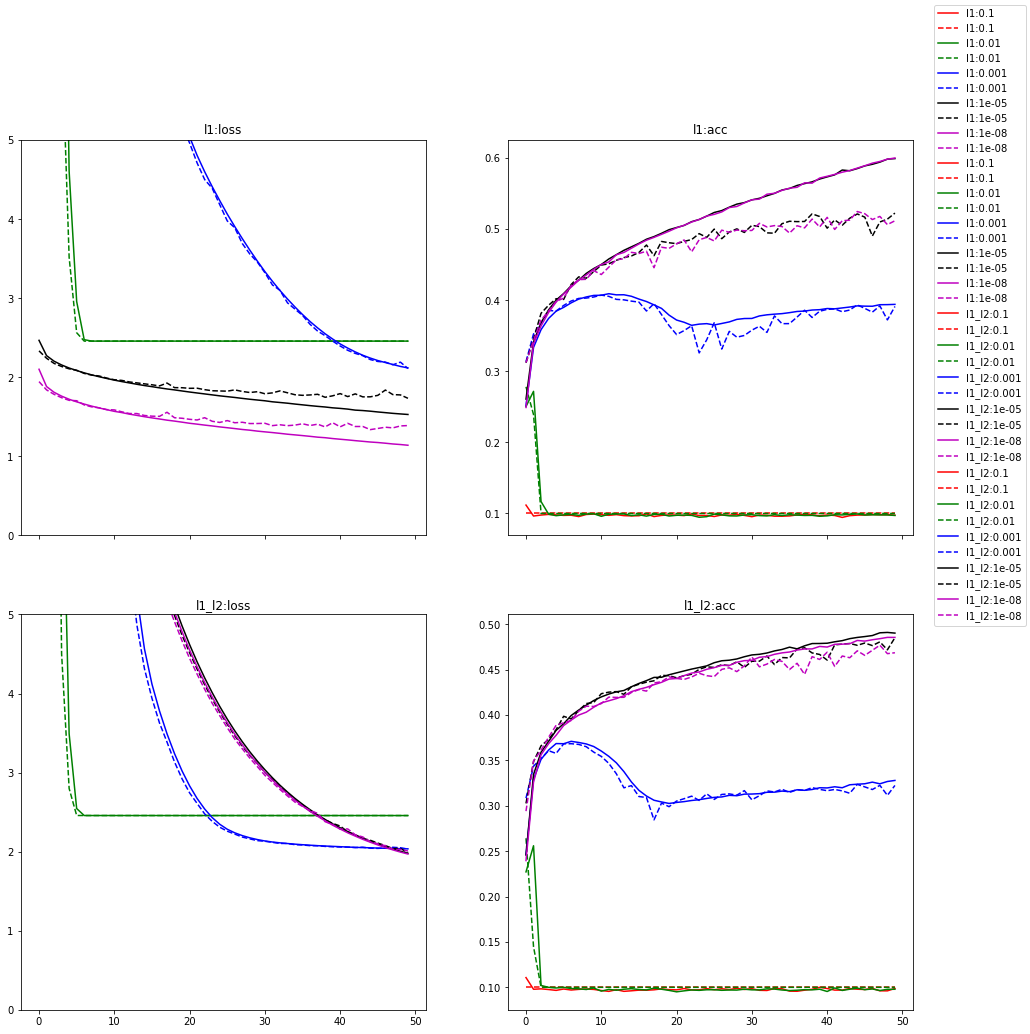

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

results = [results_l1,results_l1_l2]
color = ['r','g','b','k','m']
fig,axes = plt.subplots(2,2,sharex = True)
fig.set_size_inches(16,16)
for index,result in enumerate(results):
    if index == 0:
        axes[index][0].set_title('l1:loss')
        axes[index][1].set_title('l1:acc')
    else:
        axes[index][0].set_title('l1_l2:loss')
        axes[index][1].set_title('l1_l2:acc')
    for i,name in enumerate(result):
        axes[index][0].plot(range(epoch),result[name]['loss'],'-',color = color[i],label = name)
        axes[index][0].plot(range(epoch),result[name]['val_loss'],'--',color = color[i],label = name)
        axes[index][1].plot(range(epoch),result[name]['accuracy'],'-',color = color[i],label = name)
        axes[index][1].plot(range(epoch),result[name]['val_accuracy'],'--',color = color[i],label = name)
        axes[index][0].set_ylim([0,5])

fig.legend(loc='upper right')

In [83]:
results_l1

{'l1:0.1': {'loss': [528.5080424139404,
   17.822276973876953,
   17.82245333557129,
   17.822376380615236,
   17.822465892944336,
   17.822210086669923,
   17.822526420288085,
   17.822507899780273,
   17.82249391845703,
   17.82239006713867,
   17.822277501831056,
   17.822487896118165,
   17.82251175292969,
   17.82198478820801,
   17.82254094604492,
   17.822333673095702,
   17.822570494995116,
   17.822268450317384,
   17.822471541748047,
   17.82230006652832,
   17.822590487670897,
   17.82211137512207,
   17.82249382507324,
   17.82226099121094,
   17.822523709716798,
   17.822005548095703,
   17.82262443786621,
   17.822406240844728,
   17.822425529174804,
   17.822187049560547,
   17.822388124389647,
   17.822379657592773,
   17.822416705932618,
   17.822256154174806,
   17.822274880371094,
   17.822429826049806,
   17.822467501831056,
   17.822166430664062,
   17.82225416015625,
   17.82248150024414,
   17.82223124633789,
   17.822361591186525,
   17.8223016015625,
   17.8221